<a href="https://colab.research.google.com/github/vishal2002begani/machine_learning/blob/main/others/Ex_9_Noise_filtering_and_spectrogram/Ex9_Denoising_and_Power_spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOISE FILTERING:**

To gain familiarity with how to use and interpret the FFT, we will begin with a simple example that uses the FFT to denoise a signal. We will consider a function of time f(t):

f(t) = sin(2πf1t) + sin(2πf2t)

with frequencies f1 = 50 and f2 = 120. We then add a large amount of Gaussian white noise to this signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

It is possible to compute the fast Fourier transform of this noisy signal using the fft command. The power spectral density (PSD) is the normalized squared magnitude of ˆf, and indicates how much power the signal contains in each frequency

In [2]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

In Fig.(middle), it is clear that the noisy signal contains two large
peaks at 50 Hz and 120 Hz. It is possible to zero out components that have
power below a threshold to remove noise from the signal. After inverse transforming the filtered signal, we find the clean and filtered time-series match quite well

In [5]:
## Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal
print(indices)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

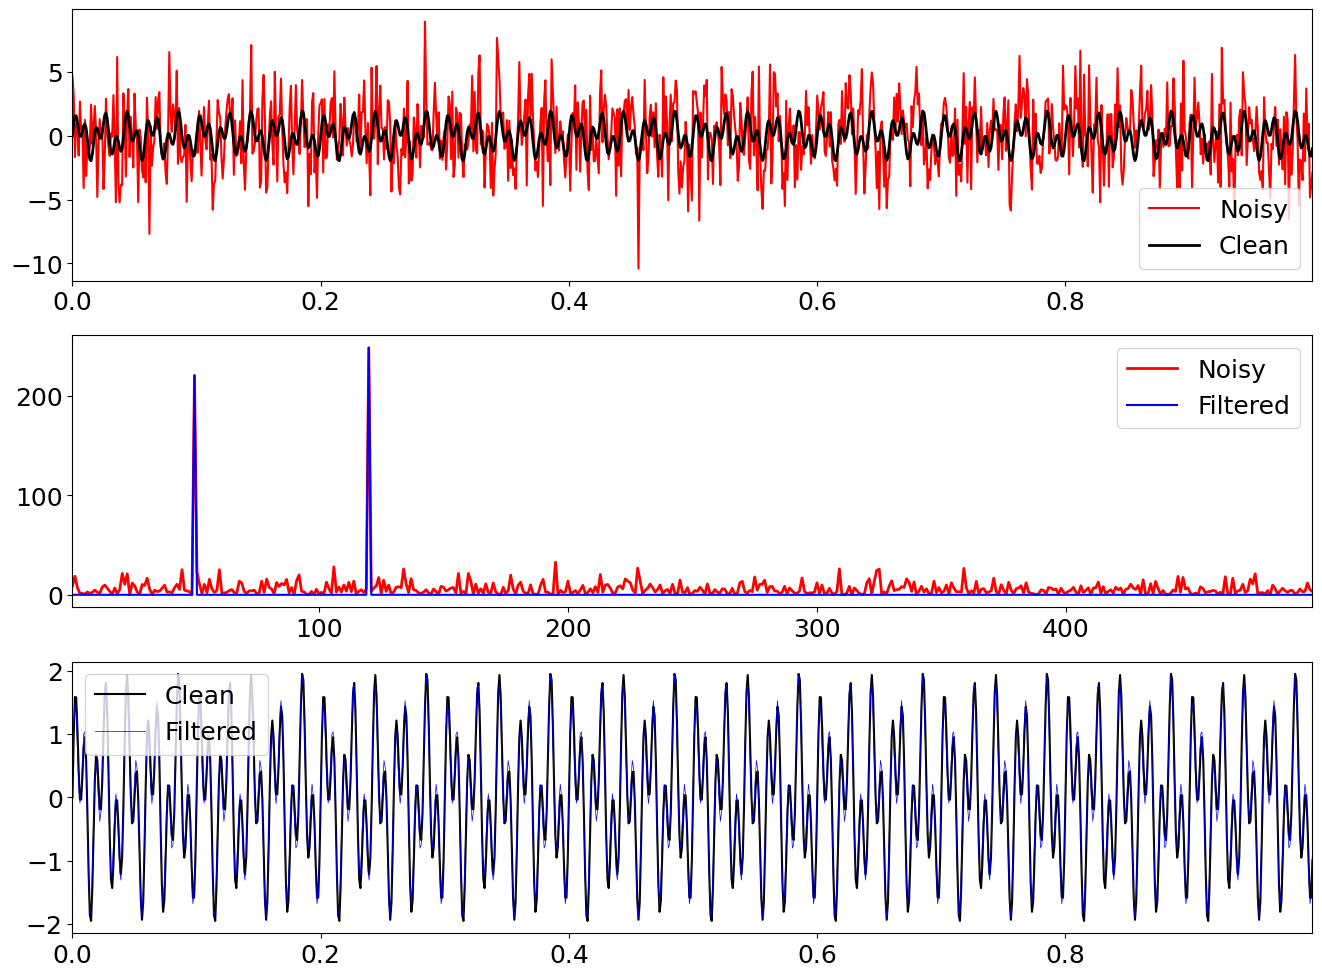

In [7]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.sca(axs[2])
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',linewidth=0.5,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.show()

**SPECTROGRAM:**

we construct an oscillating cosine function where the
frequency of oscillation increases as a quadratic function of time:

f(t) = cos(2πtω(t)) where ω(t) = ω0 + (ω1 − ω0)t^2/3t1^2

The frequency shifts from ω0 at t = 0 to ω1 at t = t1


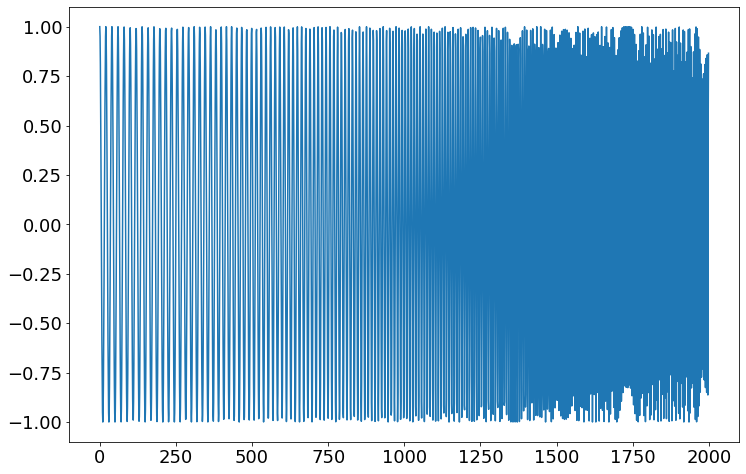

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
f1 = 250
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))
plt.plot(x)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html

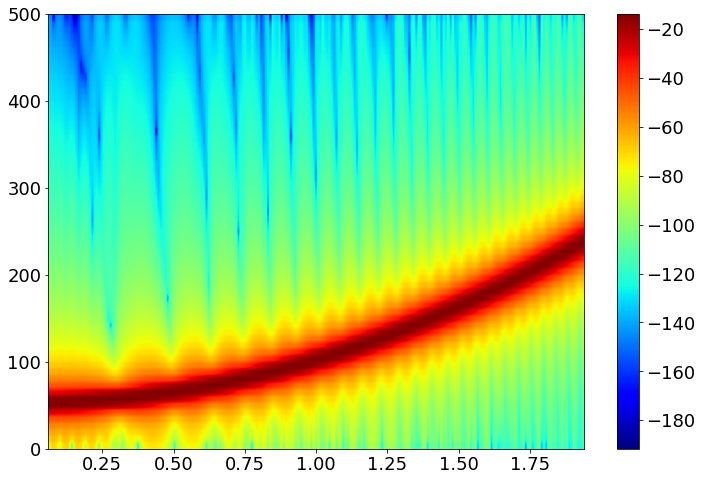

In [ ]:
plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120,cmap='jet')
plt.colorbar()
plt.show()


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

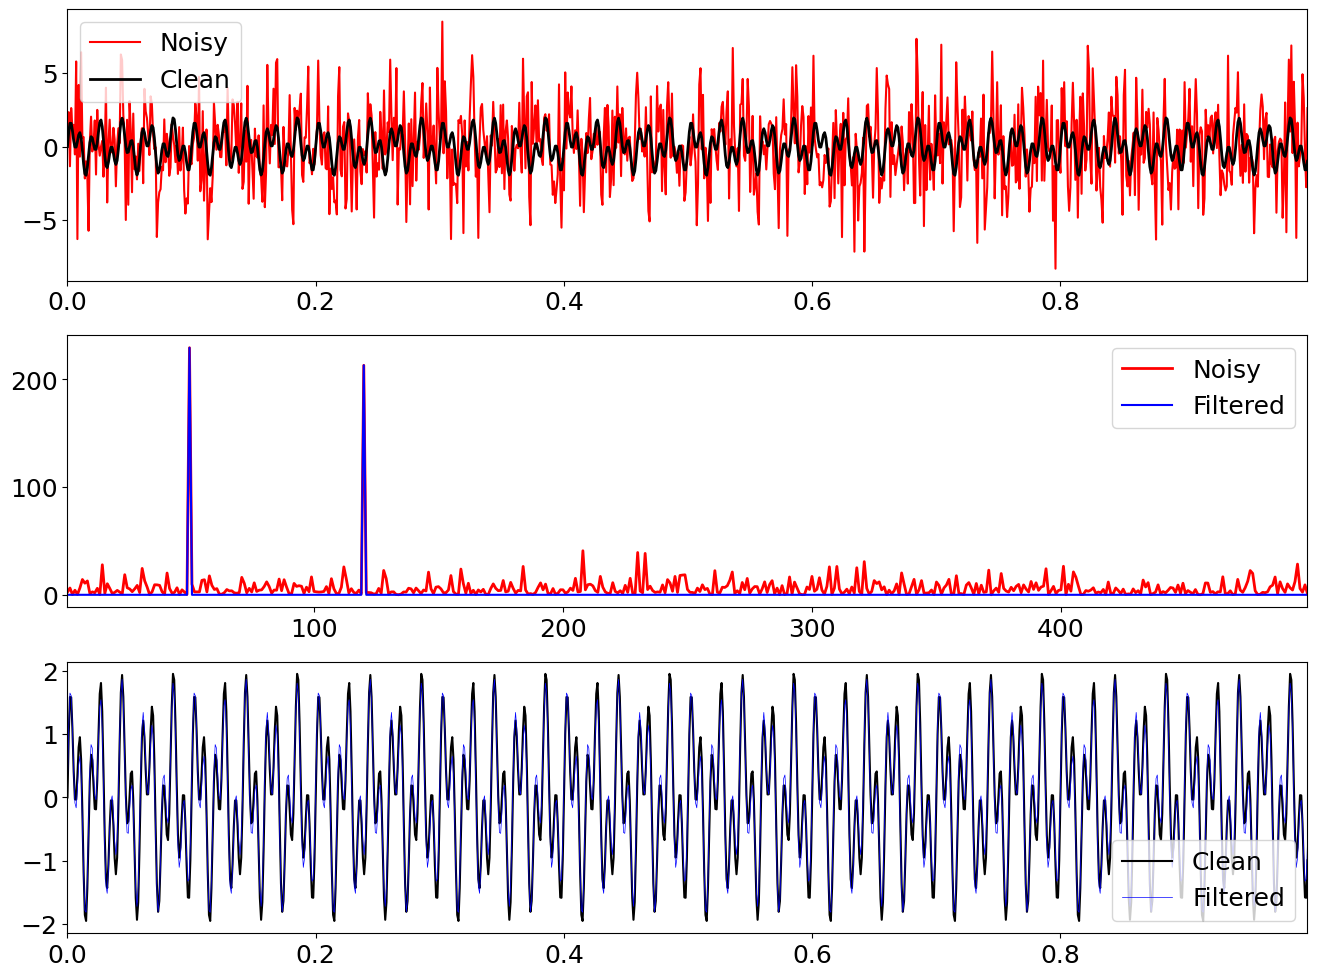

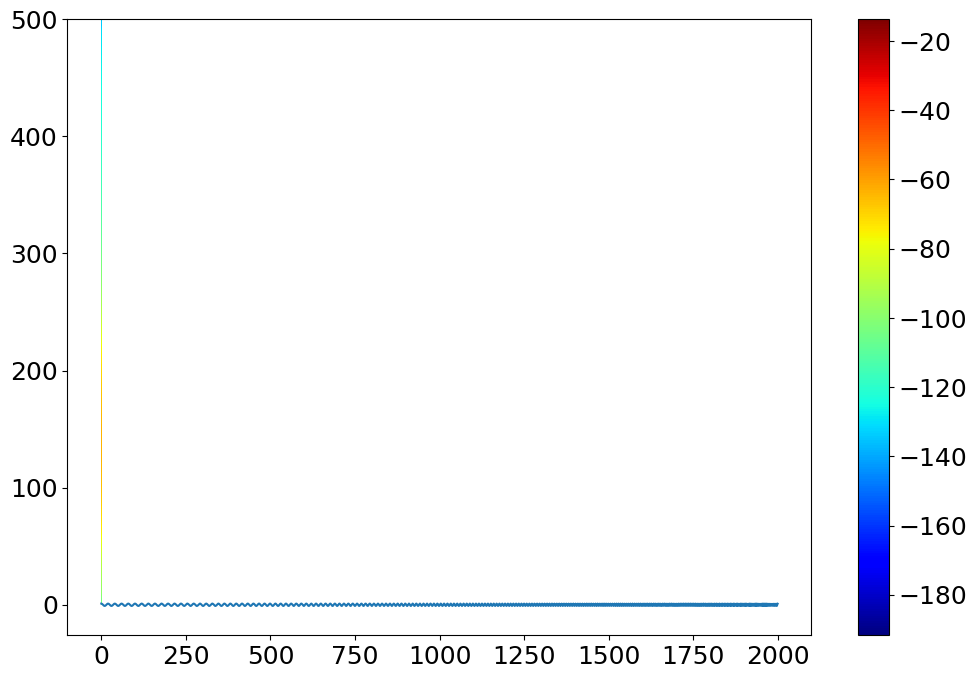

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

## Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal
print(indices)

## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.sca(axs[2])
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',linewidth=0.5,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.show()

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
f1 = 250
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))
plt.plot(x)


plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120,cmap='jet')
plt.colorbar()
plt.show()
